In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [2]:
# Ejercicio 1
matriz1=np.array([[0,-6],[5,4]])
def normal0(matriz):
    l0=np.sum(matriz!=0)
    return l0

def normal1(matriz):
    l1=np.sum(abs(matriz))
    return l1

def normal2(matriz):
    l2=np.sqrt(np.sum(abs(matriz)**2))
    return l2

def normainf(matriz):
    linf=np.max(abs(matriz))
    return linf

In [3]:
print("La norma l0 de la matriz es:",normal0(matriz1))
print("La norma l1 de la matriz es:",normal1(matriz1))
print("La norma l2 de la matriz es:",normal2(matriz1))
print("La norma l infinito de la matriz es:",normainf(matriz1))

La norma l0 de la matriz es: 3
La norma l1 de la matriz es: 15
La norma l2 de la matriz es: 8.774964387392123
La norma l infinito de la matriz es: 6


In [4]:
# Ejercicio 2
def normal2_con_axis(matriz,axis):
    l2=np.sqrt(np.sum(abs(matriz)**2,axis=axis))
    return l2

normas_ordenadas = np.argsort(normal2_con_axis(matriz1,1)[::-1])
print("Orden de las normas:",normas_ordenadas)
matriz1_ordenada=matriz1[normas_ordenadas]
print("Matriz 1 ordenada por fila según la norma l2",matriz1_ordenada)

Orden de las normas: [1 0]
Matriz 1 ordenada por fila según la norma l2 [[ 5  4]
 [ 0 -6]]


In [5]:
#Ejercicio 3
class array_ids:
    def __init__(self, ids):
        indexes = np.unique(ids, return_index=True)[1]
        ids_unicos = [ids[index] for index in sorted(indexes)]        
        
    def get_users_id(self, user_idx):
        try:
            user_id = ids_unicos[user_idx]
        except:
            user_id = -1
        return user_id
    
    def get_users_idx(self, user_id):
        try:
            user_idx = list(ids_unicos).index(user_id)
        except:
            user_idx = -1
        return user_idx

In [6]:
array1 = [1,4,3,2,5,3]

In [7]:
array_id_object = array_ids(array1)

In [8]:
array_id_object.get_users_idx(4)

-1

In [9]:
array_id_object.get_users_id(1)

-1

In [10]:
#Ejercicio 4
%time
truth = np.array([1,1,0,1,1,1,0,0,0,1])
prediction = np.array([1,1,1,1,0,0,1,1,0,0])

suma = truth+prediction
resta = truth-prediction
TP=len(suma[suma==2])
TN=len(suma[suma==0])
FN=len(suma[resta==1])
FP=len(suma[resta==(-1)])

Precision = TP / (TP + FP)
Recall = TP / (TP + FN)
Accuracy = (TP + TN) / (TP + TN + FP + FN)

print(TP)
print(TN)
print(FN)
print(FP)

print("Precision:",Precision)
print("Recall",Recall)
print("Accuracy",Accuracy)

Wall time: 0 ns
3
1
3
3
Precision: 0.5
Recall 0.5
Accuracy 0.4


In [11]:
#Ejercicio 5
q_id = np.array([1, 1, 1, 1, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4]) 
# predicted_rank = np.array([0, 1, 2, 3, 0, 1, 2, 0, 1, 2, 3, 4, 0, 1, 2, 3]) # no lo uso
truth_relevance = np.array([True, False, True, False, True, True, True, False, False, False, False, False, True, False, False, True])

In [12]:
q_id_list=list(q_id)

truth_1=truth_relevance[q_id_list.index(1):q_id_list.index(1)+len(q_id[q_id==1])]

truth_2=truth_relevance[q_id_list.index(2):q_id_list.index(2)+len(q_id[q_id==2])]

truth_3=truth_relevance[q_id_list.index(3):q_id_list.index(3)+len(q_id[q_id==3])]

truth_4=truth_relevance[q_id_list.index(4):q_id_list.index(4)+len(q_id[q_id==4])]


In [13]:
Precision_1 = np.sum(truth_1)/len(truth_1)
Precision_2 = np.sum(truth_2)/len(truth_2)
Precision_3 = np.sum(truth_3)/len(truth_3)
Precision_4 = np.sum(truth_4)/len(truth_4)
AQP = np.mean(np.array([Precision_1,Precision_2,Precision_3,Precision_4]))
print(Precision_1)
print(Precision_2)
print(Precision_3)
print(Precision_4)
print("AQP",AQP)

0.5
1.0
0.0
0.5
AQP 0.5


In [14]:
#Ejercicio 6 (Ejercicio resuelto por Lautaro)
X = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
C = np.array([[1, 0, 0], [0, 1, 1]])

def get_centroid_distances(C, X):
    expanded_C = C[:, None]
    distances = np.sqrt(np.sum((expanded_C - X) ** 2, axis=2))
    return distances


In [15]:
distancias = get_centroid_distances(C,X)
print(distancias)

[[ 3.60555128  8.36660027 13.45362405]
 [ 2.44948974  7.54983444 12.72792206]]


In [16]:
X.shape

(3, 3)

In [17]:
C.shape

(2, 3)

In [18]:
expanded_C = C[:, None]
expanded_C.shape

(2, 1, 3)

In [19]:
print((expanded_C - X))
print((expanded_C - X).shape)
print(np.sum((expanded_C - X),axis=2))
print((np.sum((expanded_C - X),axis=2)).shape)

[[[ 0 -2 -3]
  [-3 -5 -6]
  [-6 -8 -9]]

 [[-1 -1 -2]
  [-4 -4 -5]
  [-7 -7 -8]]]
(2, 3, 3)
[[ -5 -14 -23]
 [ -4 -13 -22]]
(2, 3)


In [20]:
# Ejercicio 7
id_clusters = np.argmin(distancias, axis=0)

In [21]:
#Ejercicio 8
def k_means(X, n):
    centroides = X[np.random.choice(np.arange(X.shape[0]),size=n,replace = False)]
    distancias = get_centroid_distances(centroides,X)
    id_clusters = np.argmin(distancias, axis=0)
    for i in range(10): #Elegimos hacer 10 iteraciones de recálculo de centroides
        # redeterminar los centroides -> Tomado de Lautaro
        for i in range(centroides.shape[0]):
            # cada centroide i lo recalculo como la media de todos los vectores X que tengan como id_cluster a ese centroide
            centroides[i] = np.mean(X[id_clusters == i, :], axis=0)

    return centroides,id_clusters

In [22]:
X = (5*np.random.random(size=1000)).reshape(500,2)
centroids,id_clusters = k_means(X,5)

In [23]:
id_clusters

array([1, 3, 3, 0, 0, 2, 1, 4, 0, 1, 4, 1, 2, 4, 4, 1, 4, 4, 4, 3, 1, 3,
       4, 1, 0, 2, 1, 1, 4, 3, 3, 1, 2, 3, 2, 0, 1, 3, 0, 3, 4, 3, 1, 3,
       3, 1, 3, 0, 2, 1, 1, 1, 3, 4, 4, 4, 1, 1, 4, 2, 3, 3, 1, 0, 3, 4,
       1, 1, 2, 1, 3, 3, 0, 3, 0, 2, 3, 3, 1, 1, 3, 4, 3, 3, 3, 3, 4, 3,
       4, 1, 3, 3, 1, 1, 3, 3, 1, 4, 4, 3, 3, 3, 4, 3, 3, 3, 3, 1, 2, 3,
       1, 0, 0, 3, 2, 3, 4, 3, 2, 4, 4, 1, 1, 1, 0, 3, 4, 4, 1, 1, 4, 0,
       0, 1, 0, 1, 4, 4, 3, 3, 2, 4, 1, 3, 3, 2, 2, 4, 3, 3, 4, 1, 1, 4,
       3, 1, 3, 3, 1, 3, 3, 3, 1, 4, 1, 3, 3, 0, 1, 3, 1, 3, 1, 3, 3, 4,
       3, 1, 3, 3, 3, 4, 3, 2, 2, 3, 3, 3, 3, 1, 1, 2, 2, 1, 1, 2, 3, 3,
       3, 4, 1, 1, 4, 1, 3, 4, 3, 2, 3, 2, 3, 4, 2, 3, 0, 3, 4, 1, 3, 2,
       4, 3, 1, 3, 1, 1, 1, 1, 3, 1, 0, 1, 3, 2, 1, 3, 3, 3, 4, 4, 1, 3,
       1, 4, 0, 4, 0, 3, 2, 2, 1, 3, 1, 2, 1, 2, 4, 4, 2, 1, 4, 3, 3, 3,
       4, 4, 4, 4, 2, 3, 4, 1, 3, 1, 1, 3, 3, 4, 2, 3, 1, 3, 1, 1, 3, 3,
       3, 1, 3, 1, 2, 2, 0, 2, 4, 0, 1, 3, 0, 4, 3,

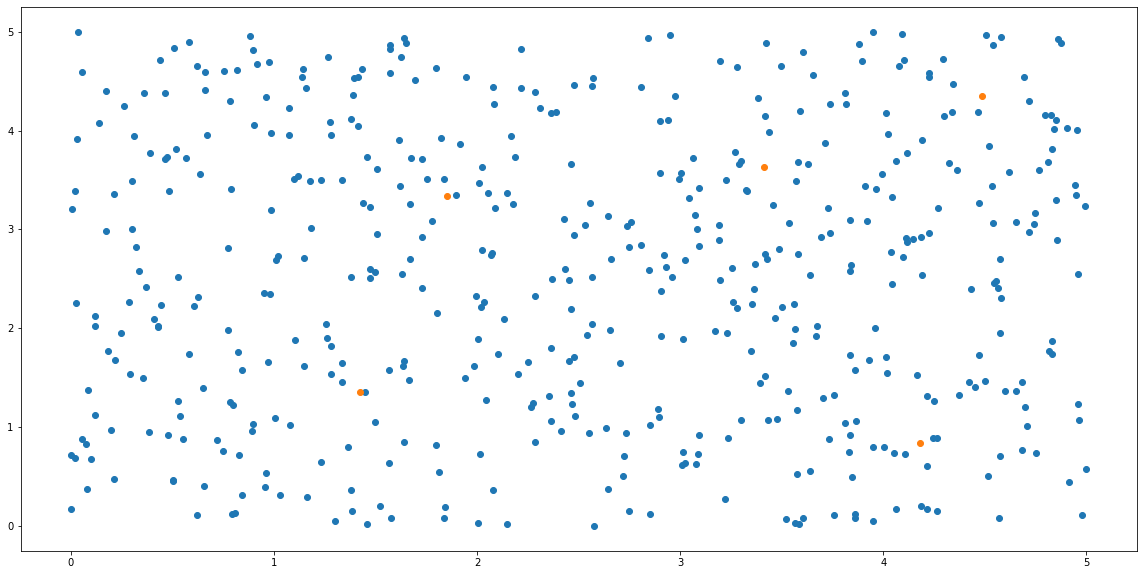

In [24]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(20,10))

plt.scatter(X[:,0],X[:,1], )
plt.scatter(centroids[:,0],centroids[:,1])
#ax[0].set(xlabel="Eje X", ylabel="Eje Y")
#ax[0].title.set_text("This title has to be very clear and explicative")
#for p in ax[0].patches:
#    ax[0].annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha="center", va="center", fontsize=12, color="white", xytext=(0, -10), textcoords="offset points")

In [25]:
#Ejercicio 9
#Resolución de Lautaro, solo agregué los comentarios.

#Creo una clase base de métricas
class metrica_base:
    def __init__(self, **kwargs): #El init lo defino con self y además con parámetros en forma de diccionario que llamo kwargs
        self.parameters = kwargs #Los parámetros que le pasé al init en forma de diccionario, los guardo como atributo parametros
    
    def __call__(self,*args,**kwargs):  #El call lo defino con self, con parámetros en forma de tupla llamados args y parámetros en forma de diccionario que llamo kwargs
        pass

#Creo una clase para la métrica precisión, a partir de la métrica base. 
class precision(metrica_base):
    def __init__(self,**kwargs):
        metrica_base.init(self,**kwargs) #El init de precision va a ser el mismo init de metrica_base al cual le podemos pasar parámetros en forma de diccionario. Los parámetros que le vamos a pasar son el conjunto de predicition y el de truth.
    
    def __call__(self): # El call lo defino solo con self porque los parámetros ya están guardados en self.parameters
        prediction = self.parameters["predictions"] # Como precision es una clase child de metrica_base, entonces tiene los parámetros self.parameters, que son los kwargs que le paso en el init
        truth = self.parameters["truth"] # esos kwargs que le paso en el init van a ser un conjunto llamado "predictions" y otro conjunto llamado "truth"
        true_pos_mask = (prediction == 1) & (truth == 1) #tomo como verdaderos positivos aquellos valores que sean 1 tanto en truth como en prediction
        true_pos = true_pos_mask.sum() 
        false_pos_mask = (prediction == 1) & (truth == 0) #tomo como falsos positivos aquellos valores que predije como 1 pero son 0 en truth    
        false_pos = false_pos_mask.sum()
        return true_pos/(true_pos + false_pos) #cuando llame a la clase, voy a devolver la precisión

    
#Creo una clase para la métrica recall, a partir de la métrica base. 
class Recall(metrica_base):
    def __init__(self, **kwargs):
        metrica_base.__init__(self, **kwargs) #El init de precision va a ser el mismo init de metrica_base al cual le podemos pasar parámetros en forma de diccionario. Los parámetros que le vamos a pasar son el conjunto de predicition y el de truth.
    
    def __call__(self):
        prediction = self.parameters["predictions"]
        truth = self.parameters["truth"]
        true_pos_mask = (prediction == 1) & (truth == 1)
        true_pos = true_pos_mask.sum()
        false_neg_mask = (prediction == 0) & (truth == 1) #tomo como falsos negativos aquellos valores que preije como 0, pero que son 1 en truth.
        false_neg = false_neg_mask.sum()
        return true_pos/(true_pos + false_neg)

#Creo una clase para la métrica accuracy, a partir de la métrica base. 
class Accuracy(metrica_base):
    def __init__(self, **kwargs):
        metrica_base.__init__(self, **kwargs)

    def __call__(self):
        prediction = self.parameters["predictions"]
        truth = self.parameters["truth"]
        true_pos_mask = (prediction == 1) & (truth == 1)
        true_pos = true_pos_mask.sum()
        false_pos_mask = (prediction == 1) & (truth == 0)
        false_pos = false_pos_mask.sum()
        true_neg_mask = (prediction == 0) & (truth == 0) # los verdaderos negativos los defino como aquellos valores que son 0 en truth y también en predictions
        true_neg = true_neg_mask.sum()
        false_neg_mask = (prediction == 0) & (truth == 1)
        false_neg = false_neg_mask.sum()
        return (true_pos + true_neg)/(true_pos + true_neg + false_pos + false_neg)
    
#Creo una clase para la métrica QueryMeanPrecision, a partir de la métrica base
class QueryMeanPrecision(metrica_base):

    def __init__(self, **kwargs):
        metrica_base.__init__(self, **kwargs)

    def __call__(self):

        """
        Definición:
        Mean Precision obtiene la media de la precisión de cada query. La precisión de una query es la cantidad de
        documentos 'true positive' (realmente relevantes), dividido por la cantidad de documentos obtenidos. Una
        precisión de 1 significa una precisión perfecta para la query.
        """

        truth_relevance = self.parameters["truth_relevance"]
        query_ids = self.parameters["q_id"]

        # Obtener la cantidad de queries con al menos un documento relevante
        true_relevance_mask = (truth_relevance == 1)
        filtered_query_id = query_ids[true_relevance_mask]
        # en las queries con relevance, cuento cuántos valores de cada query_id tengo en la filtered_query_id, es decir, cuántos valores true para cada query
        filtered_true_relevance_count = np.bincount(filtered_query_id)
        # contar queries con 0 en queries sin documentos relevantes
        unique_query_ids = np.unique(query_ids) #guardo los querys_ids únicos
        non_zero_count_idxs = np.where(filtered_true_relevance_count > 0) # guardo la posición de los querys_ids relevantes (son aquellas posiciones en filtered_true_relevance_count que tienen un valor mayor a 0)
        true_relevance_count = np.zeros(unique_query_ids.max() + 1) #armo un array de 0s de tamaño igual al máximo id único
        true_relevance_count[non_zero_count_idxs] = filtered_true_relevance_count[non_zero_count_idxs] # a aquellas posiciones de ids que tenían true, les coloco la cantidad de true que tuvieron
        # obtener el total solo para las queries existentes
        true_relevance_count_by_query = true_relevance_count[unique_query_ids] #Porque el true_relevance_count también incluye el 0, que no es ninguna query
        # obtener el total de documentos
        fetched_documents_count = np.bincount(query_ids)[unique_query_ids]  #Porque el bincount también incluye el 0, que no es ninguna query
        # calcular la métrica
        precision_by_query = true_relevance_count_by_query / fetched_documents_count
        return np.mean(precision_by_query)
        
        

class IterateMetrics(object): #La clase IterateMetrics se está creando como un child de la clase object. En Python 3.x esto ya no es necesario, ya que todas la sclases son child de object # https://stackoverflow.com/questions/4015417/why-do-python-classes-inherit-object
    def __init__(self, **kwargs):
        self.data = kwargs #Los kwargs va a ser la información que le voy a pasar para que calcule las métricas
        self.metrics = {} #Acá voy a guardar los resultados de las métricas en un diccionario

    def get_metrics(self,*args):
        #metrics_options = [Precision, Recall, Accuracy, QueryMeanPrecision]
        metrics_options = args #Cambié solo esto, para poder pasarle qué métrica quiero que compute en cada caso
        for metric in metrics_options:
            aux = metric(**self.data)
            self.metrics[metric.__name__] = aux()
        return self.metrics
        

In [26]:
iter_met = IterateMetrics(q_id=q_id,truth_relevance=truth_relevance)
iter_met.get_metrics(QueryMeanPrecision)

{'QueryMeanPrecision': 0.5}

In [55]:
#Ejercicio 10

class Dataset(object): #La clase IterateMetrics se está creando como un child de la clase object. En Python 3.x esto ya no es necesario, ya que todas la sclases son child de object # https://stackoverflow.com/questions/4015417/why-do-python-classes-inherit-object
    instance = None # Contador que será distino de None cuando ya se haya creado alguna vez el objeto.

    def __new__(cls, file_name): # cls es un homólogo a self, pero hace referencia a las clases mientras que self a la instancia. https://stackoverflow.com/questions/4613000/difference-between-cls-and-self-in-python-classes
        if Dataset.instance is None: # verificamos si se creó el objeto. Si no fue creado, entonces:
            Dataset.instance = super(Dataset, cls).__new__(cls) # La función super nos ayuda a ejecutar el método new de la clase parent "object"
            return Dataset.instance                             # Con esto, la instancia de la clase quedaría creada.
        else:
            return Dataset.instance     # Si la instancia ya estaba creada, directamente devolvemos la instancia.

    def __init__(self, file_name):
        try:
            self.structured_dataset = pickle.load(open("../data/movie_dataset.pkl", "rb")) 
            # Una vez que la instancia está creada intentamos buscar el archivo movie_dataset en formato pickle (.pkl)
            # En caso de existir, lo abrimos con pickle.load y esa apertura la asignamos al atributo structured_dataset
    
        except(OSError, IOError) as e: # En caso de un error por no encontrar el archivo
            data = self._build_dataset(file_name) # cargamos y armamos el dataset con build_dataset que definimos más abajo
            pickle.dump(data, open("../data/movie_dataset.pickle", "wb")) # guardamos el dataset en formato pickle
            self.structured_dataset = pickle.load(open("../data/movie_dataset.pickle", "rb")) # leemos el archivo en formato pickle
    
    def _build_dataset(self, path):
        structure = [('userId', np.int64),
                     ('movieId', np.int64),
                     ('rating', np.float32),
                     ('timestamp', np.int64)] # estructura que tendrán los datos del dataset
        
        with open(path, encoding="utf8") as data_csv: #El encoding utf8 es uno de los más comunes actualmente. Por lo general deberíamos verificar qué encoding tiene el archivo que queremos cargar.
            data_gen = ((int(line.split(',')[0]), int(line.split(',')[1]),
                         float(line.split(',')[2]), int(line.split(',')[3]))
                        for i, line in enumerate(data_csv) if i != 0)
            # la función enumerate nos genera una especie de índice o contador que comienza en 0 y aumenta con cada dato
            # en este caso, i es el contador o índice de la fila y line es cada la fila de datos
            # para cada fila de datos voy a tener el primer dato como entero, el segundo como entero, el tercero como float y el cuarto como entero.
            # esto lo hago para cada línea del dataset con for i, line in enumerate(data_csv) if i!= 0
            # el i!=0 lo usamos porque en la primer fila tenemos los nombres de las columnas.
            
            #Sin emabargo, lo que tenemos en data_gen todavía debemos convertirlo a un array con la estructura que necesitamos
            # Para eso, usamos np.fromiter que a partir de un objeto iterable construye un array y tenemos la opción de indicarle la estructura que queremos que tenga ese array.
            data = np.fromiter(data_gen, structure)
        return data

In [56]:
dataset_00 = Dataset("ratings.csv")

In [61]:
dataset_00.structured_dataset[0][["userId","movieId"]]

(1, 110)